In [105]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression

sb.set() # set the default Seaborn style for graphics

In [13]:
df = pd.read_csv("train.csv")

In [3]:
price = pd.DataFrame(df["SalePrice"])
area = pd.DataFrame(df["GrLivArea"])

price_train, price_test, area_train, area_test = split(price, area, test_size=0.2,random_state=9)

print("Train set: ",price_train.shape, area_train.shape)
print("Test set: ", price_test.shape, area_test.shape)

Train set:  (1168, 1) (1168, 1)
Test set:  (292, 1) (292, 1)


<AxesSubplot:>

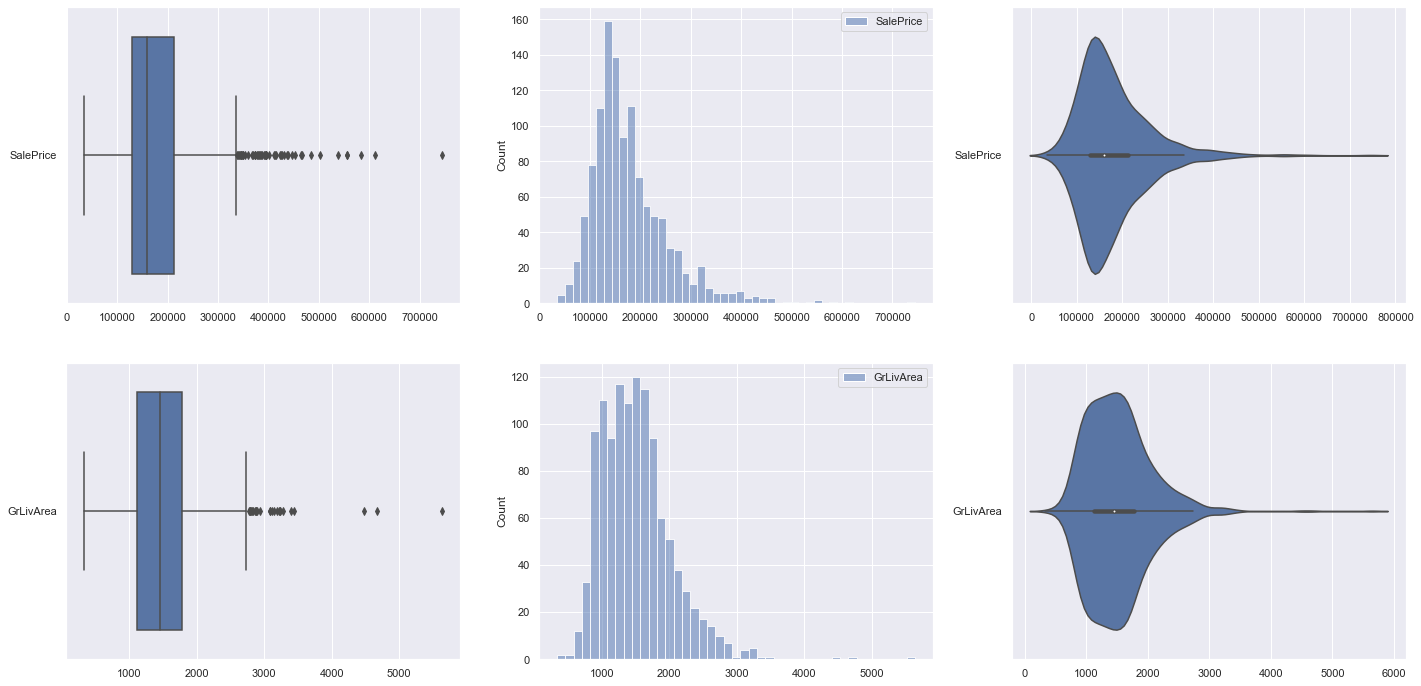

In [4]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = price_train, orient = "h", ax = axes[0,0])
sb.histplot(data = price_train, ax = axes[0,1])
sb.violinplot(data = price_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(data = area_train, orient = "h", ax = axes[1,0])
sb.histplot(data = area_train, ax = axes[1,1])
sb.violinplot(data = area_train, orient = "h", ax = axes[1,2])

Correlation coefficient: 
            GrLivArea  SalePrice
GrLivArea    1.00000    0.69925
SalePrice    0.69925    1.00000


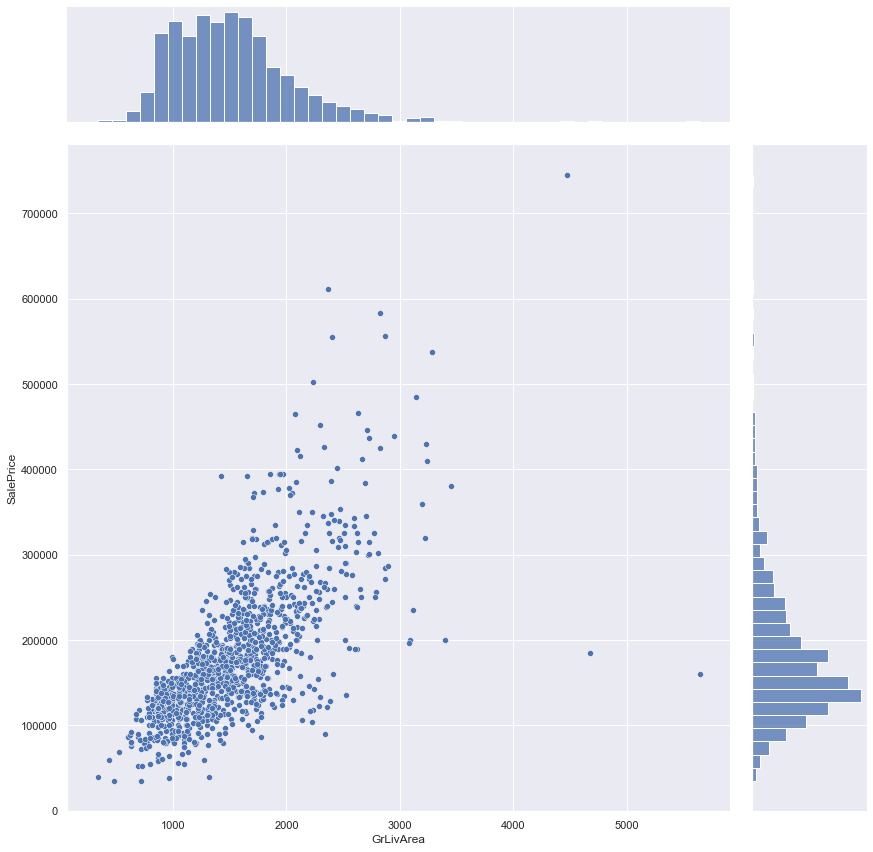

In [5]:
trainDF = pd.concat([area_train, price_train], axis=1)
sb.jointplot(data = trainDF, x = "GrLivArea", y = "SalePrice", height = 12)
print("Correlation coefficient: \n", trainDF.corr())

In [6]:
linreg = LinearRegression()
linreg.fit(area_train,price_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [22295.01560569]
Coefficients 	: a =  [[103.76854399]]


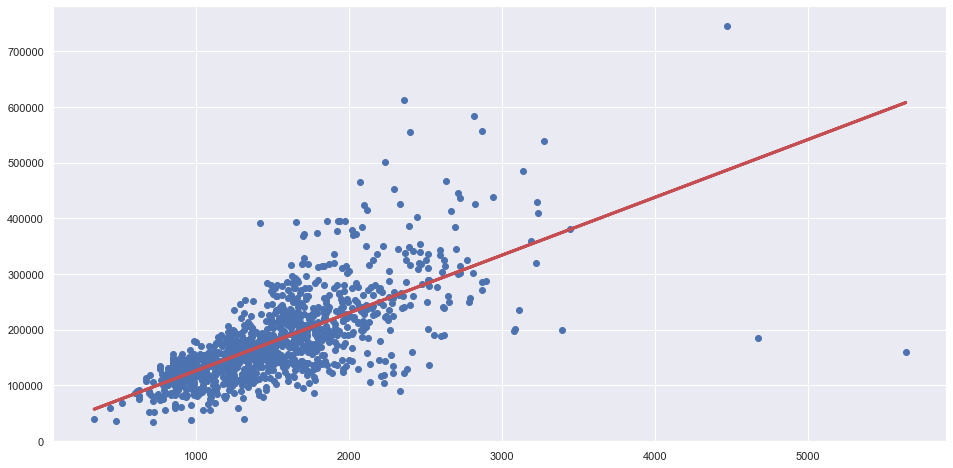

In [7]:
# Formula for the Regression line
regline_x = area_train
regline_y = linreg.intercept_ + linreg.coef_ * area_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(area_train, price_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

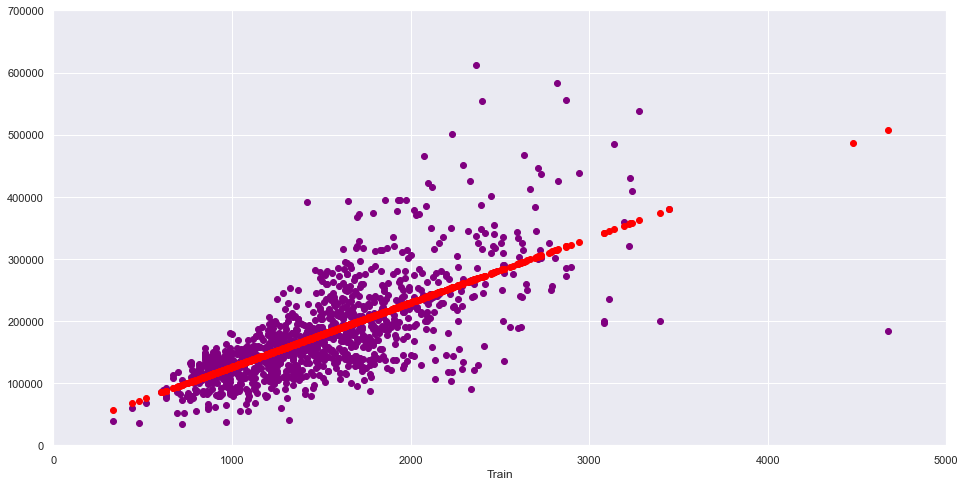

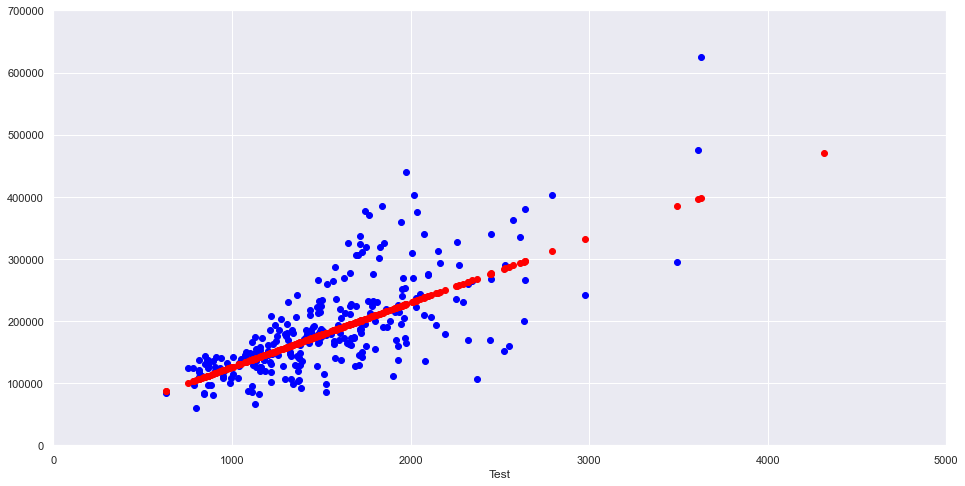

In [8]:

price_train_pred = linreg.predict(area_train)
price_test_pred = linreg.predict(area_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.xlim([0,5000])
plt.ylim([0,700000])
plt.xlabel("Train")
plt.scatter(area_train, price_train, color = "purple")
plt.scatter(area_train, price_train_pred, color = "red")
plt.show()
f = plt.figure(figsize=(16, 8))
plt.xlim([0,5000])
plt.ylim([0,700000])
plt.xlabel("Test")
plt.scatter(area_test, price_test, color = "blue")
plt.scatter(area_test, price_test_pred, color = "red")
plt.show()

In [9]:
# Explained Variance (R^2)
print("Train results")
print("Explained Variance (R^2) \t:", linreg.score(area_train, price_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

price_train_pred = linreg.predict(area_train)
mse = mean_sq_err(area_train, price_train_pred)
#print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


print("-".join(["-" for i in range(30)]))


print("Test results")
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(area_test, price_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(price_test, price_test_pred)
#print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Train results
Explained Variance (R^2) 	: 0.4889500592250875
Root Mean Squared Error (RMSE) 	: 185346.9295277977
-----------------------------------------------------------
Test results
Explained Variance (R^2) 	: 0.5384064060361072
Root Mean Squared Error (RMSE) 	: 56598.70483436171


# Problem 2

<AxesSubplot:>

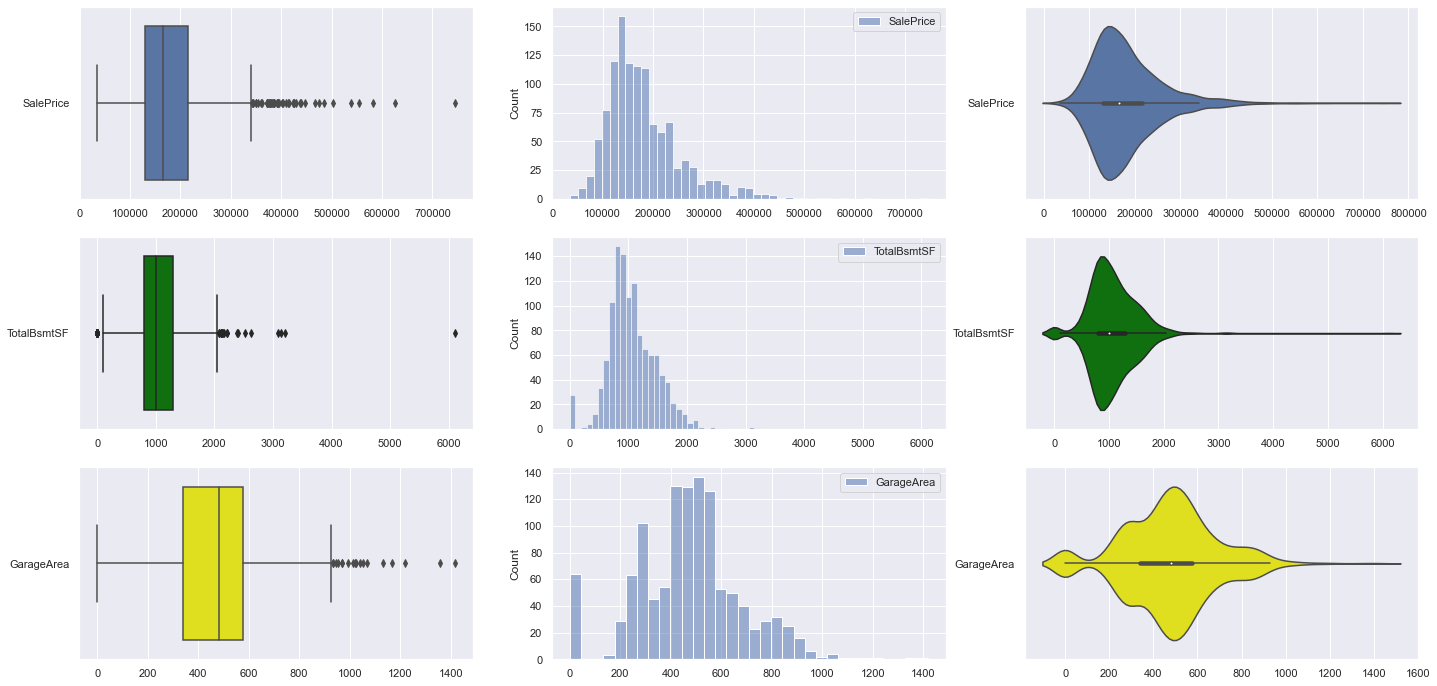

In [10]:
items=[pd.DataFrame(df["TotalBsmtSF"]),pd.DataFrame(df["GarageArea"])]
tests,trains=[0,0],[0,0]
colours=["green", "yellow"]
price = pd.DataFrame(df["SalePrice"])
f, axes = plt.subplots(3, 3, figsize=(24, 12))


for i, metric in enumerate(items):
    price_train, price_test, metric_train, metric_test = split(price, metric, test_size=0.2,random_state=42)
    sb.boxplot(data = metric_train, orient = "h", ax = axes[i+1,0],color=colours[i])
    sb.histplot(data = metric_train, ax = axes[i+1,1],color=colours[i])
    sb.violinplot(data = metric_train, orient = "h", ax = axes[i+1,2],color=colours[i])
    tests[i] = metric_test
    trains[i] = metric_train

sb.boxplot(data = price_train, orient = "h", ax = axes[0,0])
sb.histplot(data = price_train, ax = axes[0,1])
sb.violinplot(data = price_train, orient = "h", ax = axes[0,2])


Correlation coefficient: 
              TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.597766
SalePrice       0.597766   1.000000

Correlation coefficient: 
             GarageArea  SalePrice
GarageArea    1.000000   0.624139
SalePrice     0.624139   1.000000


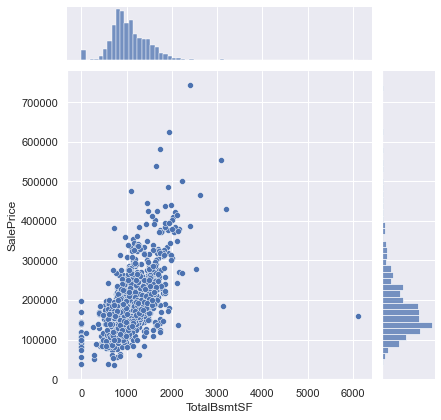

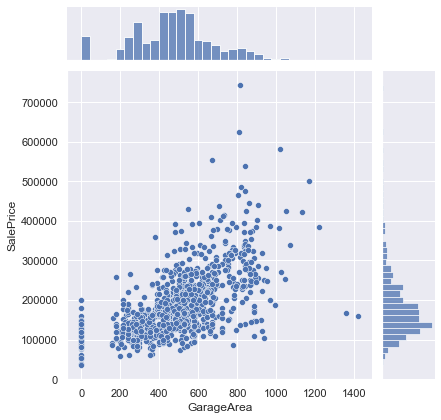

In [11]:
names = ["TotalBsmtSF","GarageArea"]

for i in range(2):
    trainDF = pd.concat([trains[i], price_train], axis=1)
    sb.jointplot(data = trainDF, x = names[i], y = "SalePrice")
    print("\nCorrelation coefficient: \n", trainDF.corr())

TotalBsmtSF
Intercept 	: b =  [70161.50459652]
Coefficients 	: a =  [[104.8060222]]
-----------------------------------------------------------
Train results
Explained Variance (R^2) 	: 0.35732403271537017
Root Mean Squared Error (RMSE) 	: 185930.01497897037
-----------------------------------------------------------
Test results
Explained Variance (R^2) 	: 0.4306435638282802
Root Mean Squared Error (RMSE) 	: 100396.909901311


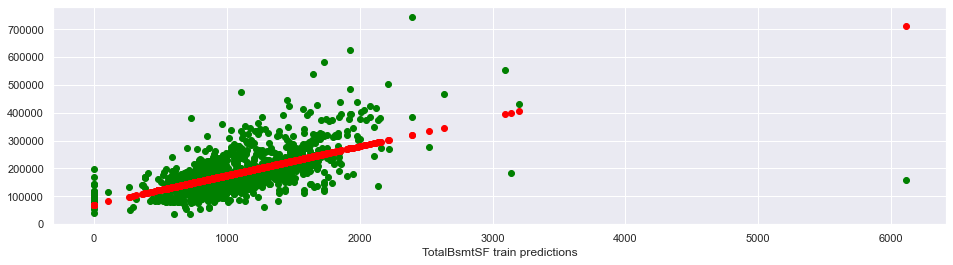

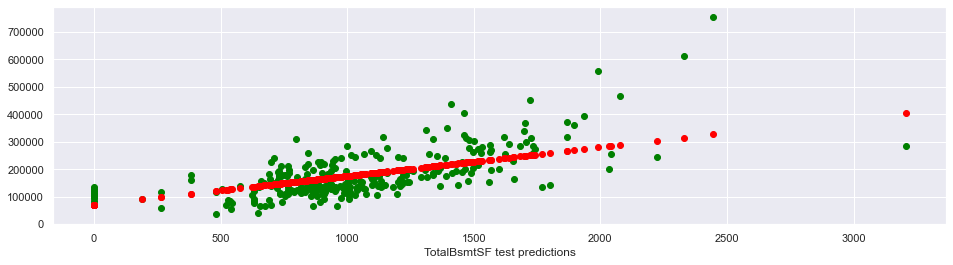

GarageArea
Intercept 	: b =  [72640.20697413]
Coefficients 	: a =  [[228.44274774]]
-----------------------------------------------------------
Train results
Explained Variance (R^2) 	: 0.38954934705845645
Root Mean Squared Error (RMSE) 	: 186735.61354333747
-----------------------------------------------------------
Test results
Explained Variance (R^2) 	: 0.38514932155571413
Root Mean Squared Error (RMSE) 	: 66084.41263716131


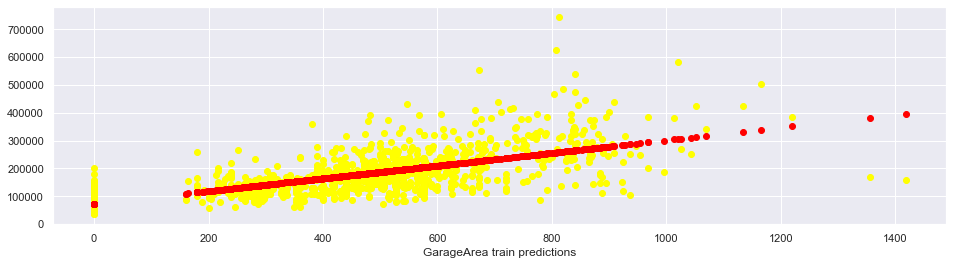

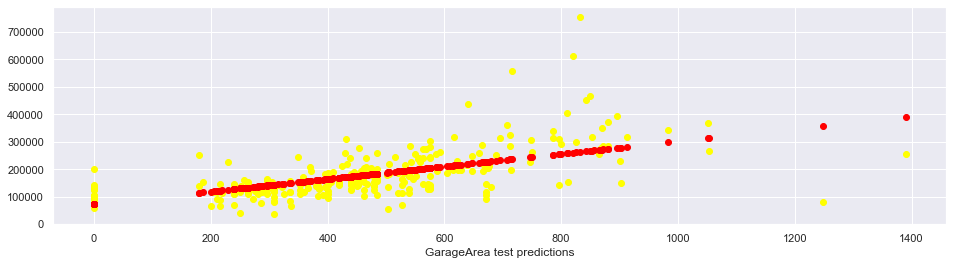

In [12]:
#f, axes = plt.subplots(2, 2, figsize=(24, 12))
for i, metric in enumerate(trains):
    print(names[i])
    linreg = LinearRegression()
    linreg.fit(metric,price_train)
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    print("-".join(["-" for i in range(30)]))
    
    # Explained Variance (R^2)
    print("Train results")
    print("Explained Variance (R^2) \t:", linreg.score(metric, price_train))
    mse = mean_sq_err(metric, price_train_pred)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

    print("-".join(["-" for i in range(30)]))

    print("Test results")
    print("Explained Variance (R^2) \t:", linreg.score(tests[i], price_test))
    mse = mean_sq_err(price_test, price_test_pred)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    
    price_train_pred = linreg.predict(metric)
    price_test_pred = linreg.predict(tests[i])
    f = plt.figure(figsize=(16, 4))
    plt.xlabel(names[i] + " train predictions")
    plt.scatter(metric, price_train, color = colours[i])
    plt.scatter(metric, price_train_pred, color = "red")
    plt.show()
    
    f = plt.figure(figsize=(16, 4))
    plt.xlabel(names[i] + " test predictions")
    plt.scatter(tests[i], price_test, color = colours[i])
    plt.scatter(tests[i], price_test_pred, color = "red")
    plt.show()

### GrLivArea is best as it has highest R^2 and lowest RMSE across train and test

# Problem 3

In [79]:
df["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

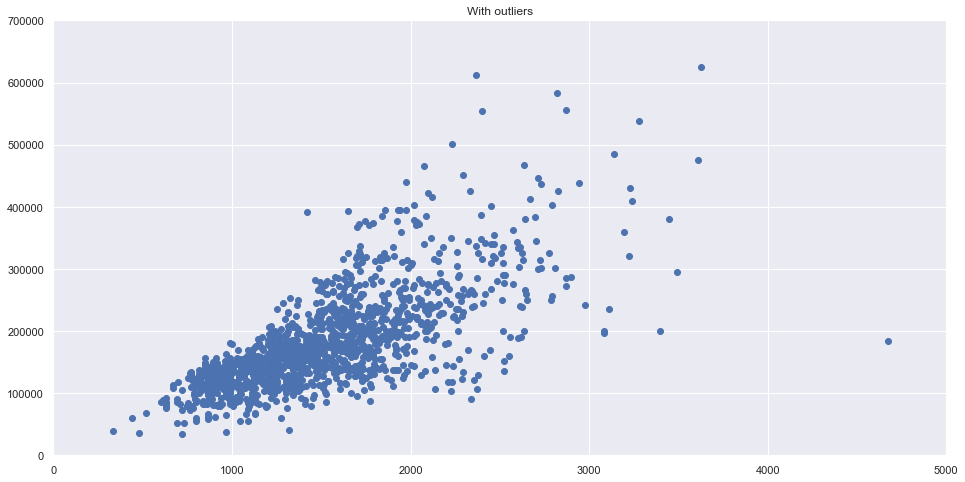

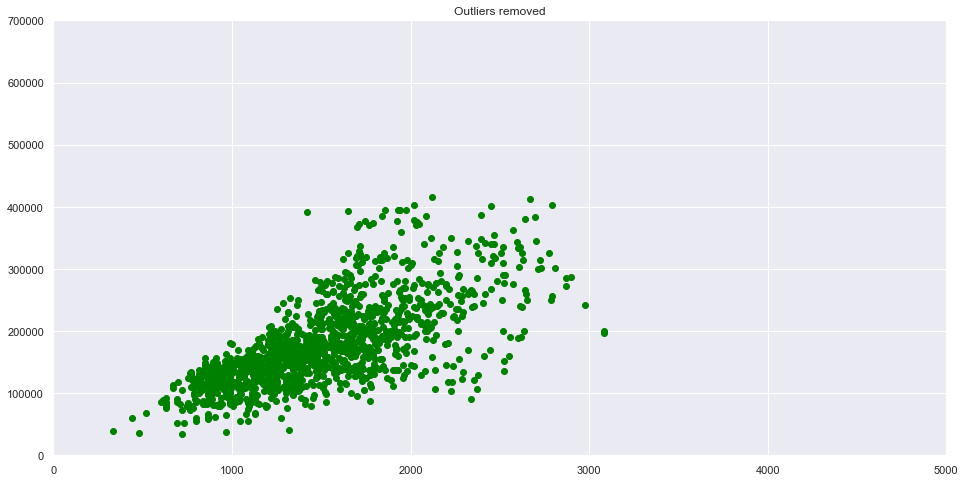

In [95]:
from scipy import stats

trainDF = df[["GrLivArea","SalePrice"]]
f = plt.figure(figsize=(16, 8))
plt.xlim([0,5000])
plt.ylim([0,700000])
plt.title("With outliers")
plt.scatter(trainDF["GrLivArea"], trainDF["SalePrice"])
plt.show()

#keeps all rows that are 3 std deviation from the mean
trimDF=trainDF[(np.abs(stats.zscore(trainDF)) < 3).all(axis=1)]
f = plt.figure(figsize=(16, 8))
plt.xlim([0,5000])
plt.ylim([0,700000])
plt.title("Outliers removed")
plt.scatter(trimDF["GrLivArea"], trimDF["SalePrice"],color="green")
plt.show()



<AxesSubplot:>

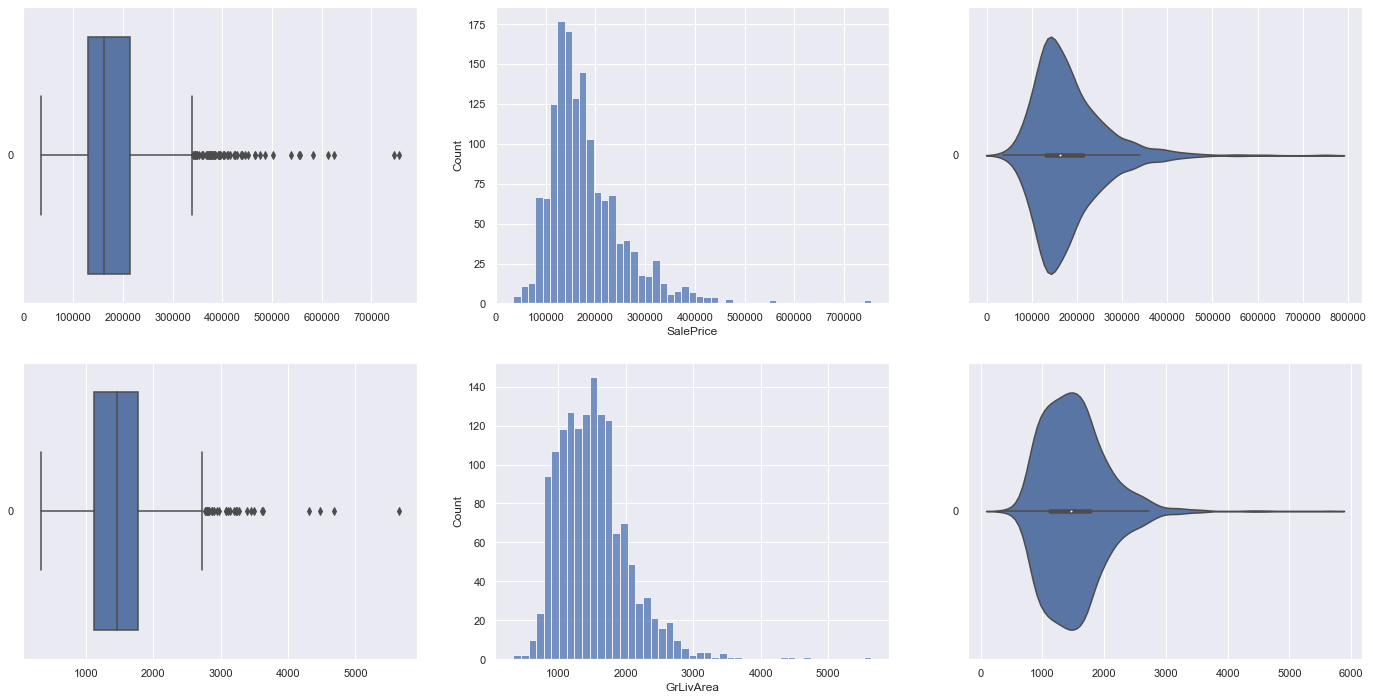

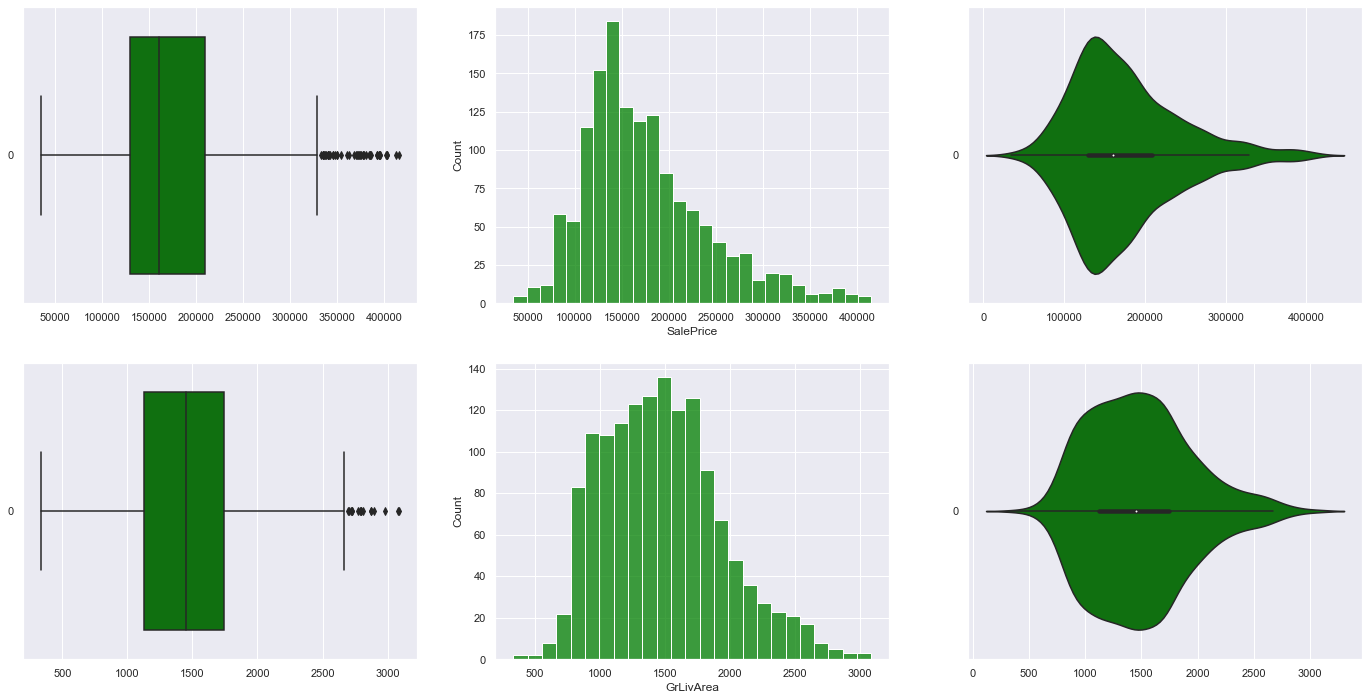

In [96]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = trainDF["SalePrice"], orient = "h", ax = axes[0,0])
sb.histplot(data = trainDF["SalePrice"], ax = axes[0,1])
sb.violinplot(data = trainDF["SalePrice"], orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(data = trainDF["GrLivArea"], orient = "h", ax = axes[1,0])
sb.histplot(data = trainDF["GrLivArea"], ax = axes[1,1])
sb.violinplot(data = trainDF["GrLivArea"], orient = "h", ax = axes[1,2])

# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = trimDF["SalePrice"], orient = "h", ax = axes[0,0],color="green")
sb.histplot(data = trimDF["SalePrice"], ax = axes[0,1],color="green")
sb.violinplot(data = trimDF["SalePrice"], orient = "h", ax = axes[0,2],color="green")

# Plot the basic uni-variate figures for Total Train
sb.boxplot(data = trimDF["GrLivArea"], orient = "h", ax = axes[1,0],color="green")
sb.histplot(data = trimDF["GrLivArea"], ax = axes[1,1],color="green")
sb.violinplot(data = trimDF["GrLivArea"], orient = "h", ax = axes[1,2],color="green")

Correlation coefficient: 
            GrLivArea  SalePrice
GrLivArea   1.000000   0.681834
SalePrice   0.681834   1.000000
Intercept 	: b =  [28025.61189144]
Coefficients 	: a =  [[98.70450472]]


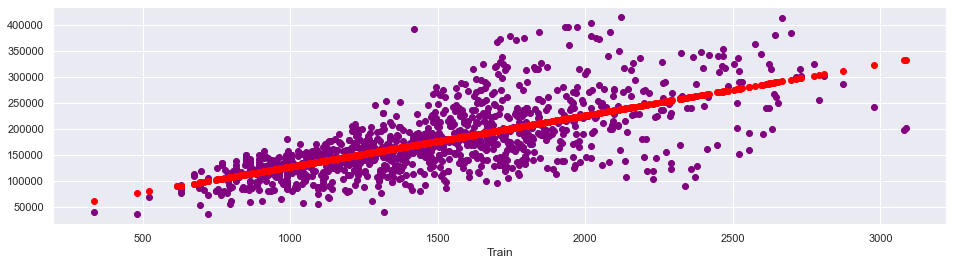

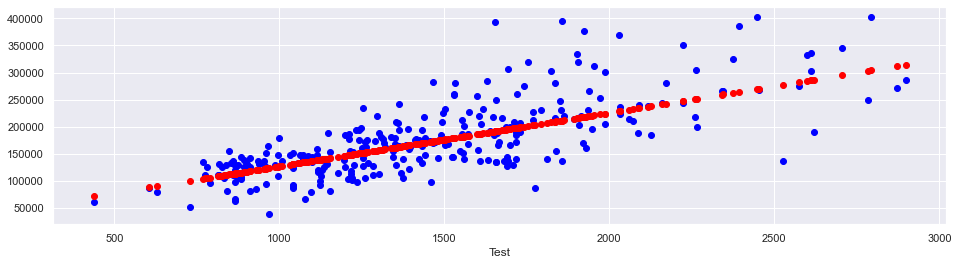

In [97]:
price = pd.DataFrame(trimDF["SalePrice"])
area = pd.DataFrame(trimDF["GrLivArea"])

price_train, price_test, area_train, area_test = split(price, area, test_size=0.2,random_state=69)
trainDF = pd.concat([area_train, price_train], axis=1)
#sb.jointplot(data = trainDF, x = "GrLivArea", y = "SalePrice", height = 12)
print("Correlation coefficient: \n", trainDF.corr())
linreg = LinearRegression()
linreg.fit(area_train,price_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
price_train_pred = linreg.predict(area_train)
price_test_pred = linreg.predict(area_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 4))
plt.xlabel("Train")
plt.scatter(area_train, price_train, color = "purple")
plt.scatter(area_train, price_train_pred, color = "red")
plt.show()
f = plt.figure(figsize=(16, 4))
plt.xlabel("Test")
plt.scatter(area_test, price_test, color = "blue")
plt.scatter(area_test, price_test_pred, color = "red")
plt.show()

In [104]:
# Explained Variance (R^2)
print("Train results")
print("Explained Variance (R^2) \t:", linreg.score(area_train, price_train))

price_train_pred = linreg.predict(area_train)
mse = mean_sq_err(area_train, price_train_pred)
#print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
StdE_pred = np.sqrt(len(price_train) * mse/(len(price_train) - 2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

print("-".join(["-" for i in range(30)]))

print("Test results")
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(area_test, price_test))

mse = mean_sq_err(price_test, price_test_pred)
#print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
StdE_pred = np.sqrt(len(price_test) * mse/(len(price_test) - 2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

Train results
Explained Variance (R^2) 	: 0.4648970909940089
Root Mean Squared Error (RMSE) 	: 179068.38034111672
Pred Standard Error (SE) 	: 179225.25
-----------------------------------------------------------
Test results
Explained Variance (R^2) 	: 0.5458184129861237
Root Mean Squared Error (RMSE) 	: 46468.59709158951
Pred Standard Error (SE) 	: 46631.93



### RMSE lowered while R^2 increased , so this model is slightly better

Results from original:

Train results
Explained Variance (R^2) 	: 0.4889500592250875
Root Mean Squared Error (RMSE) 	: 185346.9295277977
Test results
Explained Variance (R^2) 	: 0.5384064060361072
Root Mean Squared Error (RMSE) 	: 56598.70483436171